In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.reset_default_graph()

sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

In [3]:
word_sequence = " ".join(sentences).split()
word_list = word_sequence
word_list = list(set(word_list))

word_dict = {w:i for i,w in enumerate(word_list)}

#parameter
batch_size = 20
embedding_size =2
voc_size = len(word_list)

In [4]:
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]])
        random_labels.append(np.eye(voc_size)[data[i][1]])
    return random_inputs, random_labels

In [5]:
skip_gram = []
for i in range(1, len(word_sequence)-1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]
    for w in context:
        skip_gram.append([target, w])

In [6]:
inputs = tf.placeholder(tf.float32, shape=[None, voc_size])
labels = tf.placeholder(tf.float32, shape=[None, voc_size])

In [7]:
W = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
WT = tf.Variable(tf.random_uniform([embedding_size, voc_size], -1.0, 1.0))

In [8]:
hidden_layer = tf.matmul(inputs, W) #[batch_size, embedding_size]
output_layer = tf.matmul(hidden_layer, WT) #[batch_szie, voc_size]

In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer, labels=labels))
optomizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [11]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(5000):
        batch_inputs, batch_labels = random_batch(skip_gram, batch_size)
        _,loss = sess.run([optomizer, cost], feed_dict={inputs: batch_inputs, labels: batch_labels})
        if (epoch+1)%1000 ==0:
            print("Epoch: {:4d} cost={:.6f}".format(epoch+1, loss))
    trained_embeddings = W.eval()

Epoch: 1000 cost=2.407370
Epoch: 2000 cost=2.048795
Epoch: 3000 cost=2.011250
Epoch: 4000 cost=1.720789
Epoch: 5000 cost=1.887066


In [12]:
trained_embeddings

array([[ 1.2587594 ,  1.5034523 ],
       [ 1.3582591 ,  0.3692775 ],
       [-0.49018276,  2.1160467 ],
       [-0.5517564 ,  1.3539516 ],
       [ 0.35162562,  0.94557303],
       [ 0.68174344,  1.0266328 ],
       [-2.4102094 ,  0.81530994],
       [ 0.43631595,  2.5143569 ],
       [ 1.5430403 , -0.34711948],
       [ 2.5992615 , -0.6399845 ],
       [-1.2458277 , -1.3038136 ],
       [-0.16418864,  0.16430794],
       [-0.7034884 ,  1.090805  ]], dtype=float32)

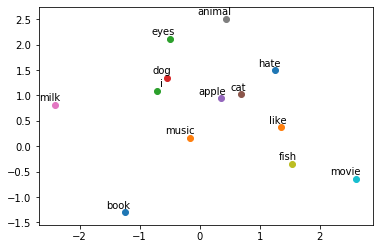

In [16]:
for i,label in enumerate(word_list):
    x,y = trained_embeddings[i]
    plt.scatter(x,y)
    plt.annotate(label, xy=(x,y), xytext=(5,2),textcoords='offset points', ha='right', va='bottom')